In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
dataset = pd.read_csv('.//datasets//drug200.csv')
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [41]:
datatypes = dataset.dtypes
datatypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [42]:
cat_cols = []
num_cols = []
id1 = "id"

columns = dataset.columns
if id1 in dataset.columns:
    dataset.drop(id1,inplace=True,axis=1)

target_column = 'Drug'
for i in range(len(datatypes)):
    if datatypes.index[i] != target_column:
        if datatypes[i]=='object':
            unqval = dataset[datatypes.index[i]].nunique()
            if (unqval < 30):
                cat_cols.append(datatypes.index[i])
            else:
                del dataset[datatypes.index[i]]
                print('Deleted: ',datatypes.index[i])
        else:
            num_cols.append(datatypes.index[i])
num_cols

['Age', 'Na_to_K']

In [43]:
cat_cols

['Sex', 'BP', 'Cholesterol']

In [44]:
cat_data = []
num_data = []
if(len(cat_cols)>0):
    cat_data = dataset[cat_cols]
if(len(num_cols)>0):
    num_data = dataset[num_cols]
y_data = dataset[target_column]

In [45]:
num_data,cat_data

(     Age  Na_to_K
 0     23   25.355
 1     47   13.093
 2     47   10.114
 3     28    7.798
 4     61   18.043
 ..   ...      ...
 195   56   11.567
 196   16   12.006
 197   52    9.894
 198   23   14.020
 199   40   11.349
 
 [200 rows x 2 columns],
     Sex      BP Cholesterol
 0     F    HIGH        HIGH
 1     M     LOW        HIGH
 2     M     LOW        HIGH
 3     F  NORMAL        HIGH
 4     F     LOW        HIGH
 ..   ..     ...         ...
 195   F     LOW        HIGH
 196   M     LOW        HIGH
 197   M  NORMAL        HIGH
 198   M  NORMAL      NORMAL
 199   F     LOW      NORMAL
 
 [200 rows x 3 columns])

In [46]:
if len(num_data):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
    imputer.fit(num_data.iloc[:,:].values)
    num_data = pd.DataFrame(imputer.transform(num_data.iloc[:,:].values))
    num_data.columns = num_cols
num_data

,Age,Na_to_K
0,23.0,25.355
1,47.0,13.093
2,47.0,10.114
3,28.0,7.798
4,61.0,18.043
...,...,...
195,56.0,11.567
196,16.0,12.006
197,52.0,9.894
198,23.0,14.020


In [47]:
if(len(cat_data)>0 and len(num_data)>0):
    print("1")
    df = pd.concat([num_data,cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
    df.isnull().sum()
elif(len(num_data) > 0):
    print("2")
    df = pd.concat([num_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
else:
    print("3")
    df = pd.concat([cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
(df)

1


,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23.0,25.355,F,HIGH,HIGH,DrugY
1,47.0,13.093,M,LOW,HIGH,drugC
2,47.0,10.114,M,LOW,HIGH,drugC
3,28.0,7.798,F,NORMAL,HIGH,drugX
4,61.0,18.043,F,LOW,HIGH,DrugY
...,...,...,...,...,...,...
195,56.0,11.567,F,LOW,HIGH,drugC
196,16.0,12.006,M,LOW,HIGH,drugC
197,52.0,9.894,M,NORMAL,HIGH,drugX
198,23.0,14.020,M,NORMAL,NORMAL,drugX


In [48]:
cat_data = df[cat_cols]
num_data = df[num_cols]
y_data = df[target_column]
df.drop(target_column,inplace=True,axis=1)
len(y_data)

200

In [49]:
#if len(cat_cols):
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(df[cat_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [50]:
OH_X

,Age,Na_to_K,0,1,2,3,4,5,6
0,23.0,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47.0,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47.0,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28.0,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61.0,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,56.0,11.567,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,16.0,12.006,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,52.0,9.894,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,23.0,14.020,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [51]:
count = y_data.value_counts()
print(count)
print(max(count))
print(min(count))
cond = min(count)/max(count)
print(cond)

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
91
16
0.17582417582417584


In [52]:
from imblearn.over_sampling import ADASYN
from collections import Counter
if(cond<0.3):
    counter = Counter(y_data)
    print('before :',counter)
    ADA = ADASYN(random_state=130,sampling_strategy='minority')
    OH_X,y_data = ADA.fit_resample(OH_X,y_data)
    counter = Counter(y_data)
    print("after :",counter)

before : Counter({'DrugY': 91, 'drugX': 54, 'drugA': 23, 'drugC': 16, 'drugB': 16})
after : Counter({'drugB': 92, 'DrugY': 91, 'drugX': 54, 'drugA': 23, 'drugC': 16})


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc_x = StandardScaler()

In [55]:
OH_X = sc_x.fit_transform(OH_X)

In [56]:
OH_X

array([[-1.58228144,  1.61713525,  1.16716493, ..., -0.52143015,
         1.01632116, -1.01632116],
       [-0.14873546, -0.26143297, -0.9444993 , ..., -0.52143015,
         1.01632116, -1.01632116],
       [-0.14873546, -0.71782302, -0.9444993 , ..., -0.52143015,
         1.01632116, -1.01632116],
       ...,
       [ 1.22507944, -0.57271471, -0.9444993 , ..., -0.52143015,
         1.01632116, -1.01632116],
       [ 1.20795981, -0.73295408, -0.9444993 , ..., -0.52143015,
         1.01632116, -1.01632116],
       [ 1.28211792, -0.76873554, -0.9444993 , ..., -0.52143015,
         1.01632116, -1.01632116]])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(OH_X,y_data,test_size=0.2,random_state=0)

[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  10 1.0
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  15 1.0
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  20 1.0
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  25 1.0
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  50 1.0
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  100 1.0
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]] No of Estimators:  200 1.0


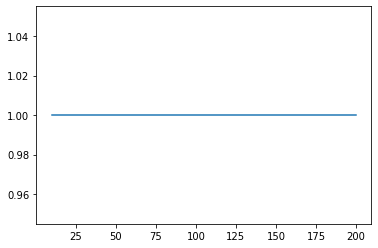

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
nodes = [10,15,20,25,50,100,200]
accuracy =[]
for node in nodes:    
    model = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators=node)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(y_test,preds)
    accuracy.append(accs)
    print(confusion_matrix(y_test,preds),'No of Estimators: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)

In [60]:
from xgboost import XGBClassifier   #XGBoostClassifier
classifier = XGBClassifier(max_depth=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[22:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[21  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0  2  0]
 [ 0  0  0  0  8]]


C:\Anaconda3\envs\tensorflow_en\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1.0